<a href="https://colab.research.google.com/github/KishikTanwar1208/Cognifyz-ML/blob/main/Project_Predict_Restaurant_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv("Dataset .csv")

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df.shape

(9542, 21)

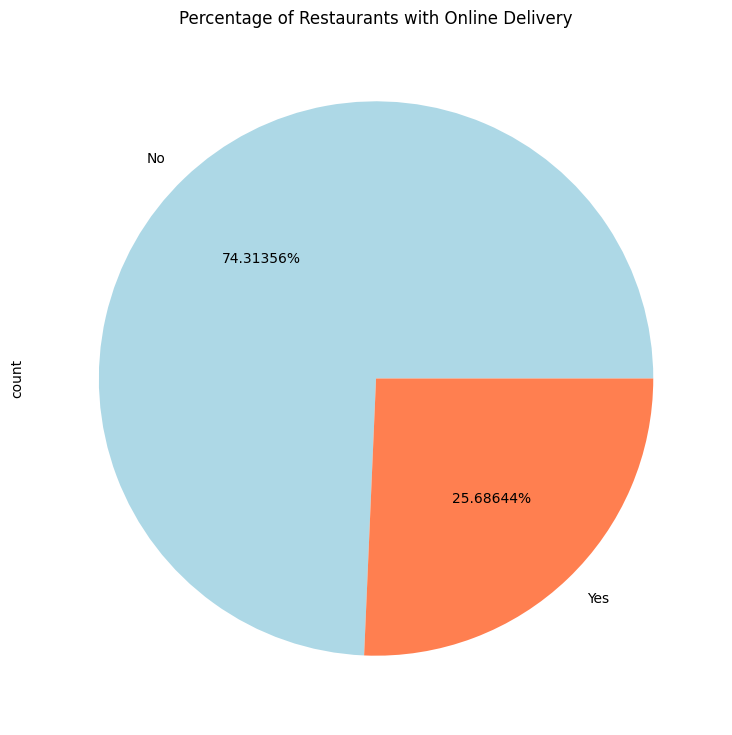

In [10]:
plt.figure(figsize=(9, 9))
df['Has Online delivery'].value_counts().plot.pie(autopct='%1.5f%%', colors=['lightblue', 'coral'])
plt.title('Percentage of Restaurants with Online Delivery')
plt.show()

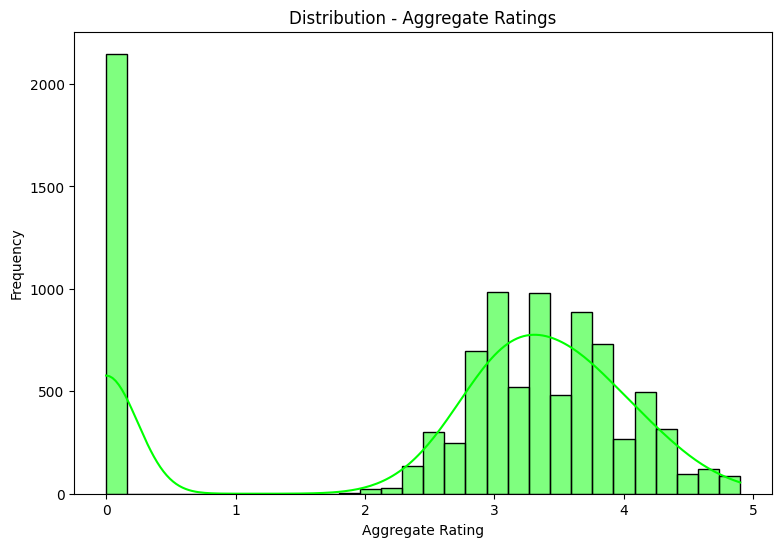

In [11]:
plt.figure(figsize=(9, 6))
sns.histplot(df['Aggregate rating'], bins=30, kde=True, color='lime')
plt.title('Distribution - Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()

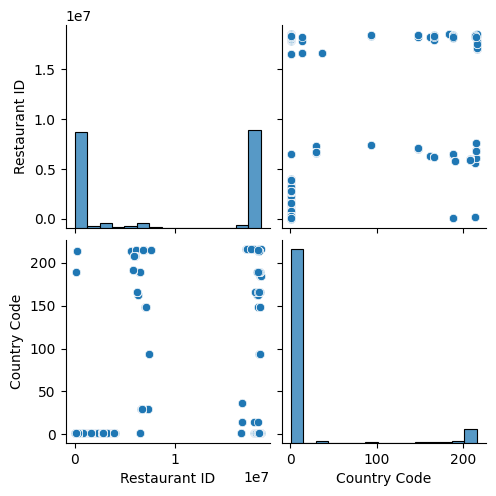

In [12]:
sns.pairplot(df[["Restaurant ID", "Country Code"]])
plt.show()

<ipython-input-13-dedeaaa8e6cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='pastel')


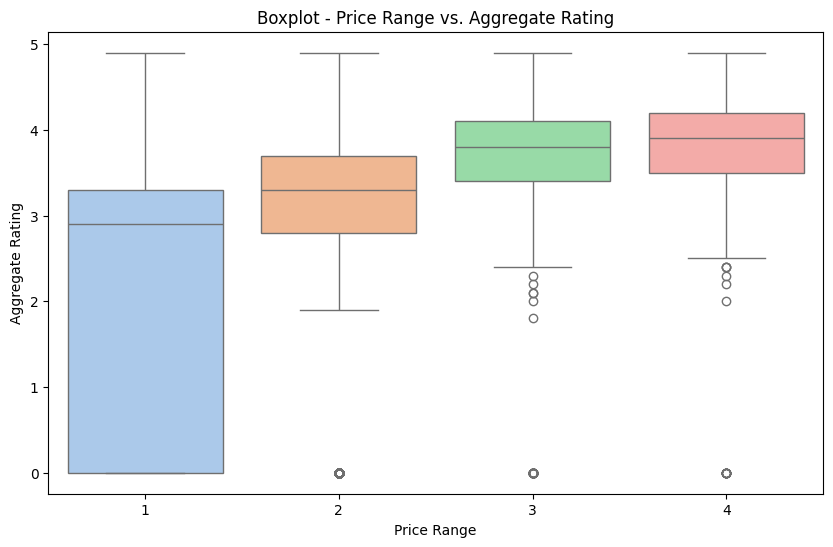

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df, palette='pastel')
plt.title('Boxplot - Price Range vs. Aggregate Rating')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()

In [14]:
X = df.drop(columns=['Aggregate rating', 'Restaurant ID', 'Restaurant Name', 'Rating color'])
y = df['Aggregate rating']

In [15]:
num_features = ['Country Code', 'Average Cost for two', 'Price range', 'Votes']
cat_features = ['City', 'Cuisines', 'Currency',
                'Has Table booking', 'Has Online delivery', 'Is delivering now',
                'Switch to order menu', 'Rating text']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model_linear_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [18]:
model_linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Country Code',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City', 'Cuisines',
                                                   'Currency',
                                                   'Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Switch to order menu',
                                                   'Rating text'])])),
                ('regressor', LinearRegression())])

In [19]:
y_pred_linear_regression = model_linear_regression.predict(X_test)
msqur_linear_regression = mean_squared_error(y_test, y_pred_linear_regression)
rsqur_linear_regression = r2_score(y_test, y_pred_linear_regression)

In [20]:
print(f'RandomForestRegressor :')
print(f'Mean Squared Error: {msqur_linear_regression}')
print(f'R-squared: {rsqur_linear_regression}')

RandomForestRegressor :
Mean Squared Error: 0.03174260757761223
R-squared: 0.9861387942222731


In [21]:
model_decision_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [22]:
model_decision_tree.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Country Code',
                                                   'Average Cost for two',
                                                   'Price range', 'Votes']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['City', 'Cuisines',
                                                   'Currency',
                                                   'Has Table booking',
                                                   'Has Online delivery',
                                                   'Is delivering now',
                                                   'Switch to order menu',
                                                   'Rating text'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [23]:
y_pred_decision_tree = model_decision_tree.predict(X_test)
msqur_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
rsqur_decision_tree = r2_score(y_test, y_pred_decision_tree)

In [24]:
print(f'DecisionTreeRegression :')
print(f'Mean Squared Error: {msqur_decision_tree}')
print(f'R-squared: {rsqur_decision_tree}')

DecisionTreeRegression :
Mean Squared Error: 0.05459799342296722
R-squared: 0.9761584167262778


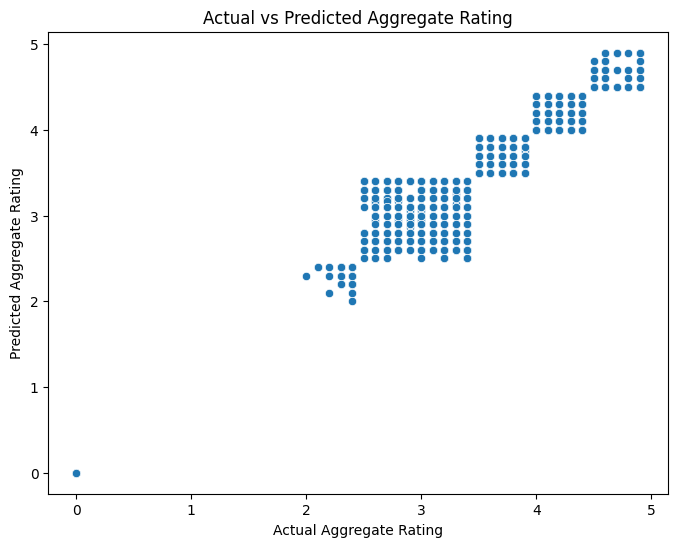

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_decision_tree)
plt.xlabel('Actual Aggregate Rating')
plt.ylabel('Predicted Aggregate Rating')
plt.title('Actual vs Predicted Aggregate Rating')
plt.show()

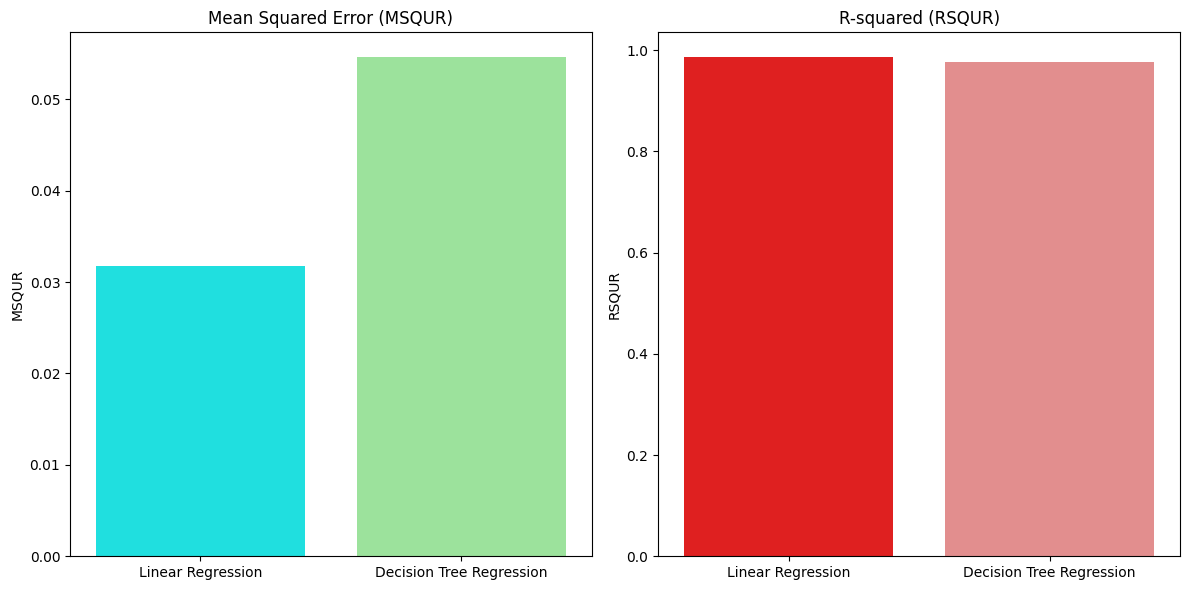

In [26]:
models = ['Linear Regression', 'Decision Tree Regression']
msqur_values = [msqur_linear_regression, msqur_decision_tree]
rsqur_values = [rsqur_linear_regression, rsqur_decision_tree]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

colors_msqur = ['cyan', 'lightgreen']
sns.barplot(x=models, y=msqur_values, hue=models, palette=colors_msqur, ax=axes[0], legend=False)
axes[0].set_title('Mean Squared Error (MSQUR)')
axes[0].set_ylabel('MSQUR')

colors_rsqur = ['red', 'lightcoral']
sns.barplot(x=models, y=rsqur_values, hue=models, palette=colors_rsqur, ax=axes[1], legend=False)
axes[1].set_title('R-squared (RSQUR)')
axes[1].set_ylabel('RSQUR')

plt.tight_layout()
plt.show()

### Among the Regression Models used Linear Regression Produces Less Error Compared to the Other one .So,It is the best model to use.
